In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel('Resource.xlsx')

select_column = ['TypeJob', 'Budget', 'Width', 'Length', 'Height', 'Wood (sm.)', 'Wood (pc.)', 'Lighting (pc.)', 'Nail (box.)', 'Table', 'Chair', 'Paint (bucket)', 'Booth', 
                 'BuildIN', 'Kiosk', 'Logo', 'Stage', 'Stand', 'Towerbox', 'Vinyl']

select_x = ['Budget', 'Width', 'Length', 'Height', 'Wood (sm.)', 'Booth', 
                 'BuildIN', 'Kiosk', 'Logo', 'Stage', 'Stand', 'Towerbox', 'Vinyl']


y_wood = ['Wood (pc.)']
y_lighting = ['Lighting (pc.)']
y_nail = ['Nail (box.)']
y_table = ['Table']
y_chair = ['Chair']
y_paint = ['Paint (bucket)']

data = df[select_column]

data_x = df[select_x]
data_y_wood = df[y_wood]
data_y_lighting = df[y_lighting]
data_y_nail = df[y_nail]
data_y_table = df[y_table]
data_y_chair = df[y_chair]
data_y_paint = df[y_paint]

df.describe()

,Reso_ID,Hire_ID,Year,Budget,Width,Length,Height,Wood (sm.),Wood (pc.),Lighting (pc.),...,Chair,Paint (bucket),Booth,BuildIN,Kiosk,Logo,Stage,Stand,Towerbox,Vinyl
count,455.000000,0.0,455.000000,4.550000e+02,455.000000,455.000000,455.00000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,250.512088,NaN,2020.883516,2.089813e+05,4.309231,4.022637,2.43000,61.229890,21.107692,24.173626,...,4.523077,2.523077,0.463736,0.292308,0.090110,0.021978,0.070330,0.015385,0.010989,0.035165
std,142.312924,NaN,1.793789,2.352527e+05,2.545931,2.894540,1.17332,77.264501,26.589460,12.109566,...,6.337343,3.276370,0.499232,0.455324,0.286654,0.146773,0.255983,0.123212,0.104366,0.184399
min,1.000000,NaN,2016.000000,9.500000e+03,0.400000,0.400000,0.30000,0.200000,0.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,127.500000,NaN,2020.000000,4.500000e+04,2.500000,2.400000,1.80000,10.800000,4.000000,15.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,254.000000,NaN,2021.000000,1.200000e+05,4.000000,3.000000,2.50000,25.000000,9.000000,20.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,373.500000,NaN,2022.000000,3.000000e+05,6.000000,4.000000,3.35000,77.500000,27.000000,32.000000,...,8.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,496.000000,NaN,2023.000000,1.800000e+06,14.000000,14.000000,8.00000,302.400000,104.000000,60.000000,...,24.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_x_scaled = scaler.fit_transform(data_x)


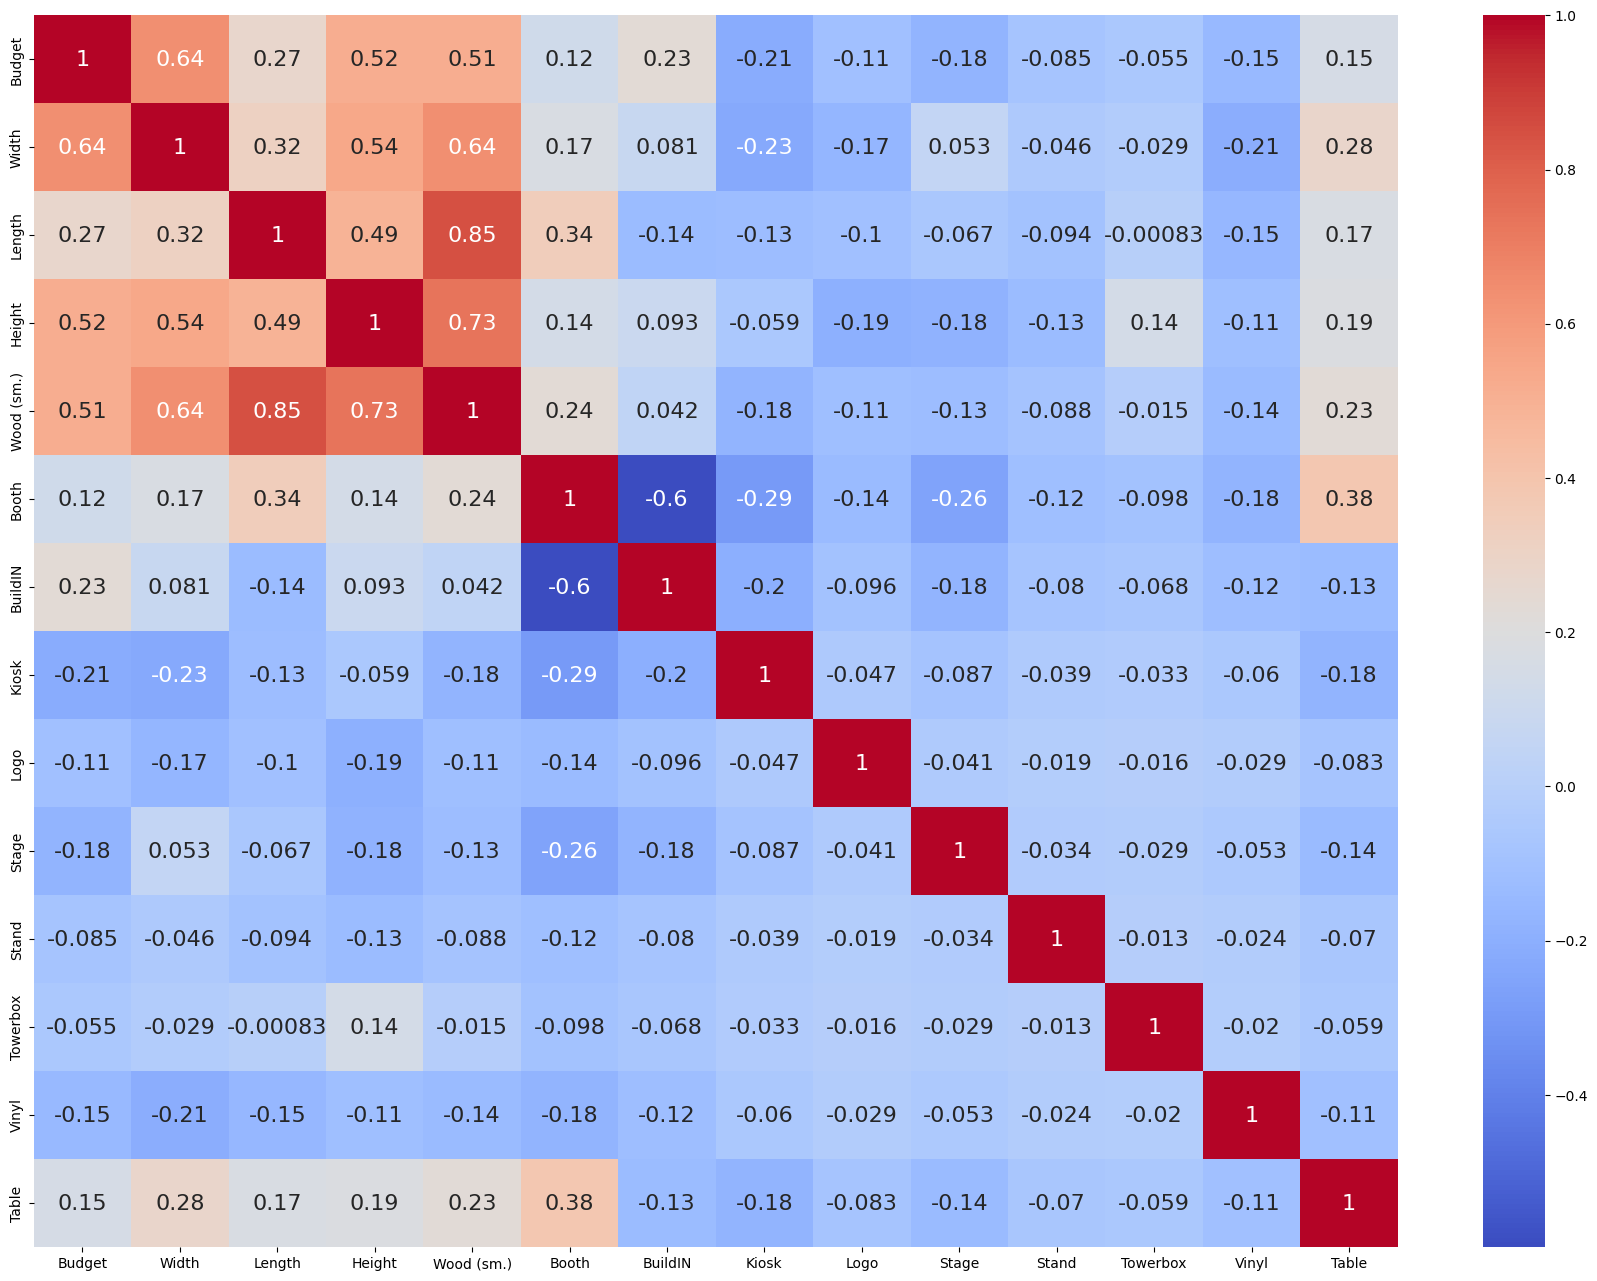

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 16))
# สร้าง correlation matrix
data = pd.concat([data_x, data_y_table], axis=1)  # รวม data_x กับ data_y_table
corr = data.corr()

# ดูความสัมพันธ์
sns.heatmap(corr, annot=True, cmap="coolwarm", annot_kws={"size": 16})
plt.show()


In [11]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

estimators = [
    ('lr', LinearRegression()),
    ('gbr', GradientBoostingRegressor(random_state=0))
]

model = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor())
scores = cross_val_score(model, data_x, data_y_table.values.ravel(), cv=5, scoring='r2')
print("Average R2 Score (Stacking Regressor): ", scores.mean() * 100)


Average R2 Score (Stacking Regressor):  -49.78138708688354
